# Konfiguracja

In [1]:

from google.colab import drive
drive.mount('/content/drive/')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!ls -la '/content/drive/My Drive/Colab Notebooks/'

total 33808
-rw------- 1 root root  3738237 Sep 25 06:54  20211025_SDA_cv_day_1.ipynb
-rw------- 1 root root    16475 Apr 23 19:36 'burden estimates.ipynb'
-rw------- 1 root root    15710 May 15 10:31 'cars_rental ORM.ipynb'
-rw------- 1 root root    27126 Sep 25 06:58  ch-01_Overview_of_TensorFlow_and_Machine_Learning.ipynb
-rw------- 1 root root   641151 Sep 25 12:06  computervision_20211025_SDA.ipynb
-rw------- 1 root root   176572 Jul 24 06:55 'Copy of LogisticRegression_SDA_20210711.ipynb'
-rw------- 1 root root     5465 Sep 25 07:44  cv_part1.ipynb
-rw------- 1 root root   647069 Sep 26 09:56  cv_zadania.ipynb
-rw------- 1 root root    75464 Sep  4 12:10 'Cwiczenia Tensorflow_0309.ipynb'
-rw------- 1 root root    34627 Oct 16 07:14  Detection_part_2.ipynb
-rw------- 1 root root  3027258 Oct 16 07:25  Detekcja_part_1.ipynb
-rw------- 1 root root    89866 Jun  4 23:07  Eurovision_dataset.ipynb
-rw------- 1 root root      646 Apr 25 08:08 'Feature engineering.ipynb'
-rw------- 1 roo

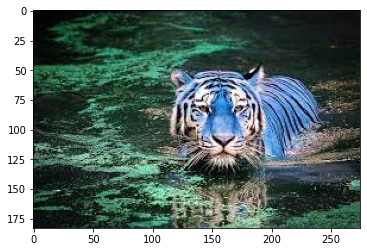

In [24]:
import cv2
import matplotlib.pyplot as plt

# from google.colab.patches import cv2_imshow

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

img = cv2.imread('/Users/victorcid/sda-academy/image-processing/download.jpeg')
plt.imshow(img)

In [13]:
img[-1]

array([[ 18,  26,  25],
       [ 12,  20,  19],
       [  7,  15,  14],
       [  7,  15,  14],
       [ 12,  20,  19],
       [ 12,  20,  19],
       [  7,  15,  14],
       [  1,   9,   8],
       [ 10,  18,  17],
       [ 12,  20,  19],
       [ 14,  22,  21],
       [ 12,  20,  19],
       [  9,  17,  16],
       [  8,  16,  15],
       [  9,  17,  16],
       [ 12,  20,  19],
       [  7,  12,  10],
       [ 10,  15,  13],
       [ 13,  20,  17],
       [ 16,  23,  20],
       [ 17,  24,  21],
       [ 16,  23,  20],
       [ 12,  21,  18],
       [ 10,  19,  16],
       [ 27,  38,  35],
       [ 23,  34,  31],
       [ 13,  24,  21],
       [  0,  11,   8],
       [ 20,  34,  30],
       [ 38,  52,  48],
       [ 31,  45,  41],
       [  2,  13,  10],
       [ 12,  21,  18],
       [ 35,  44,  41],
       [ 49,  60,  57],
       [ 27,  41,  37],
       [ 23,  38,  34],
       [ 22,  39,  35],
       [  5,  22,  18],
       [ 15,  35,  30],
       [ 52,  72,  67],
       [ 36,  56

# Filtry

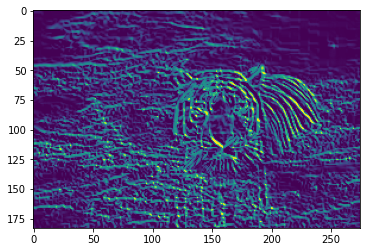

In [20]:
#Filters
# TODO: Fix the cv2.imgshow

import numpy as np

def apply_filter(source, kernel):
  new_image = cv2.filter2D(source, -1, kernel)
  plt.imshow(new_image)
  return new_image


#idendity
idendity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
apply_filter(img, idendity_kernel)

#blur
blur_kernel = np.ones((3, 3), np.float32) / 9
apply_filter(img, blur_kernel)

#sharpen
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

apply_filter(img, sharpen_kernel)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#simply_edge_detection
simply_edge_kernel = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])

apply_filter(gray_img, simply_edge_kernel)

#bottom sobel
bottom_sobel_kernel = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

bottom_sobel = apply_filter(gray_img, bottom_sobel_kernel)

#bottom sobel
left_sobel_kernel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

left_sobel = apply_filter(gray_img, left_sobel_kernel)


#sobel
sobel = left_sobel/2 + bottom_sobel/2
plt.imshow(sobel)



# Histogram Equalization

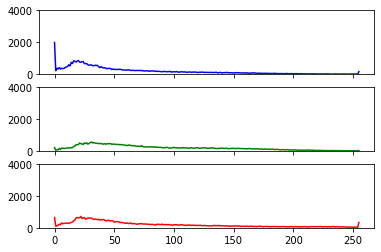

In [21]:
import matplotlib.pyplot as plt

def show_histogram(image):
  ax1 = plt.subplot(331)
  plt.xlim([0, 256])
  plt.ylim([0, 4000])
  for i, col in enumerate(['b', 'g', 'r']):

      hist = cv2.calcHist([image], [i], None, [256], [0, 256])
      ax1 = plt.subplot(3,1,i+1, sharey=ax1)
      plt.plot(hist, color = col)
      
      if i<2:
        plt.setp(ax1.get_xticklabels(), visible=False)

  plt.show()

show_histogram(img)

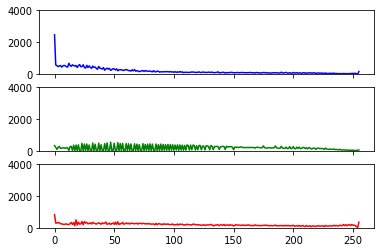

In [22]:
def show_hsv_equalized(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(new_image)
    eq_H = cv2.equalizeHist(H)
    eq_S = cv2.equalizeHist(S)
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, eq_S, eq_V]), cv2.COLOR_HSV2BGR)
    plt.imshow(eq_image)
    show_histogram(eq_image)

show_hsv_equalized(img)

# Progression

In [25]:
def threshold(image):
  @interact(x=widgets.IntSlider(min=0, max=255, step=1, value=100))
  def trackbar(x):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh1 = cv2.threshold(gray_img,x,255,cv2.THRESH_BINARY)
    plt.imshow(thresh1)
  
threshold(img)

interactive(children=(IntSlider(value=100, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [28]:
def adaptive_threshold(image):
  @interact(x=widgets.IntSlider(min=3, max=15, step=2, value=9), y=True)
  def trackbar(x, y):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if y:
      adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
    else:
      adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C

    result = cv2.adaptiveThreshold(gray_img,255,adaptive_method, 
                                      cv2.THRESH_BINARY,x,2)
    plt.imshow(result)
  
  
adaptive_threshold(img)

interactive(children=(IntSlider(value=9, description='x', max=15, min=3, step=2), Checkbox(value=True, descrip…

# Morphological operation

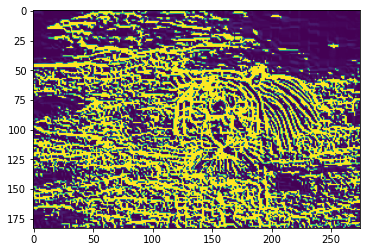

interactive(children=(Dropdown(description='operation', options=('Erosion', 'Dilation', 'Opening', 'Closing'),…

In [29]:
def morphological_operation(image):

  def opening(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  
  def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  @interact(operation=['Erosion','Dilation', 'Opening', 'Closing'], 
            struct_el=['MORPH_RECT','MORPH_ELLIPSE', 'MORPH_CROSS'], 
            size = widgets.IntSlider(min=3, max=15, step=2, value=5))
  def trackbar(operation, struct_el, size):
    operation_dict = {'Erosion': cv2.erode,'Dilation': cv2.dilate,
                      'Opening': opening, 'Closing': closing}
    struct_el_dict = {'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT,(size, size)),
                      'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
                      'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))}
    result = operation_dict[operation](image, struct_el_dict[struct_el])
    plt.imshow(result)
  

#using sobel output form above
sobel[sobel>30] = 255
plt.imshow(sobel)
morphological_operation(sobel)


# Feature Extraction

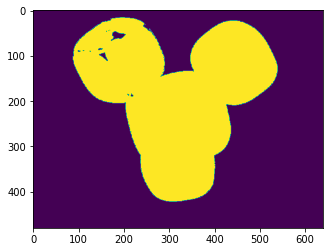

In [30]:
import numpy as np
shapes = cv2.imread('/Users/victorcid/sda-academy/image-processing/test.png')

gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
_,thresh1 = cv2.threshold(gray_shapes,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)

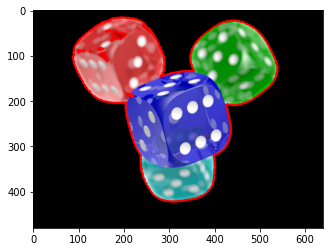

In [32]:
contours, hierarchy	=	cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = cv2.drawContours(shapes, contours, -1, (255,0,0), 3)
plt.imshow(img_with_contours)
# print(hierarchy)

In [33]:
# Get rid of internal contours, extract information about childs

filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

print(has_a_child)

[0, 0, 0, 1]


In [34]:
# Get all usefull information from contours
features_list = []

for contour, childs in zip(filtered_contours, has_a_child):
  print(contour)
  moments = cv2.moments(contour)
  hu_moments = cv2.HuMoments(moments)
  
  contour_area = cv2.contourArea(contour)
  arc_length = cv2.arcLength(contour, True)
  if arc_length > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
    features['has_child'] = childs
    features_list.append(features)

[[[259  44]]]
[[[257  41]]

 [[257  42]]

 [[256  43]]

 [[257  43]]

 [[258  42]]]
[[[248  32]]]
[[[190  16]]

 [[189  17]]

 [[182  17]]

 ...

 [[202  16]]

 [[192  16]]

 [[191  17]]]


In [35]:
# Save data as pd.DataFrame
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(features_list)
df

,0,1,2,3,4,5,6,circularity,has_child
0,0.26,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.48,0
1,0.21,0.00,0.01,0.00,-0.00,0.00,-0.00,0.40,1


[0 1]
     0    1    2    3     4     5     6    7    8
0 0.47 0.04 0.01 0.00 -0.00 -0.00 -0.00 0.88 0.00
1 0.19 0.00 0.00 0.00 -0.00  0.00 -0.00 0.36 0.91


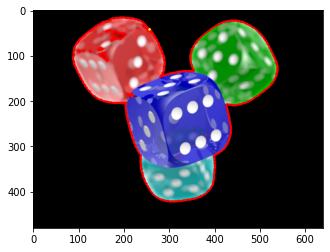

In [38]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values #returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(shapes, [contour], 0, colors[label], 3)
  
print(df)
plt.imshow(classified)


# Self-session

**MNIST**

The MNIST dataset is an acronym for the Modified National Institute of Standards and Technology dataset.

This is a dataset containing 60,000 small square 28 × 28 pixel grayscale images made up of handwritten single digits 0 through 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values ​​from 0 to 9 inclusive.

It is a widely used and deeply understood dataset that is mostly "resolved". The models with the highest performance are deep learning convolutional neural networks that achieve classification accuracy above 99%, with an error rate between 0.4% and 0.2% for the test dataset.

**Task**

Using conventional methods, create a pipeline that extracts features from the image and try to solve the problem based on them.

1. Load the image database into memory
2. Display a few sample images for an introduction to MNIST
3. Create a function that retrieves information about the appropriate contour from the image
4. Create a function that gets the features from the contour
5. Present the data in the form of dataframes (don't forget - both for test and training images)
6. Normalize the data!
7. Classification! Report the results.

# Answers

1. Load the image database into memory




In [8]:
import tensorflow as tf

minst = tf.keras.datasets.mnist

(train_x, train_y), (test_X, test_Y) = minst.load_data()

print(f'X_train: {str(train_x.shape)}')
print(f'Y_train: {str(train_y.shape)}')
print(f'X_test: {str(test_X.shape)}')
print(f'Y_test: {str(test_Y.shape)}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


2. Display a few sample images for an introduction to MNIST

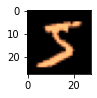

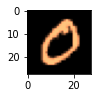

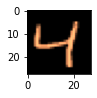

In [10]:
from matplotlib import pyplot

for i in range(3):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('copper'))
    pyplot.show()

3. Create a function that retrieves information about the appropriate contour from the image


In [15]:
import pandas as pd

def get_contour(image):
    _,thresh1 = cv2.threshold(image,50,255,cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    childs_list = []

    for contour, h in zip(contours, hierarchy[0]):
        if h[3] == -1:
            return contour, len(contours)-1


4. Create a function that gets the features from the contour

In [14]:
def get_features(cnt, childs):

    moments = cv2.moments(cnt)
    hu_moments = cv2.HuMoments(moments)
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    contour_area = cv2.contourArea(cnt)
    arc_length = cv2.arcLength(cnt, True)

    try:
        features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
    except ZeroDivisionError:
        features['circularity'] = 0
    
    features['chirlds'] = childs

    return features

5. Present the data in the form of dataframes (don't forget - both for test and training images)

In [16]:
# train data

lst_features = []

for image in train_x:
    contour, childs = get_contour(image)
    lst_features.append(get_features(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_train = pd.DataFrame(lst_features)
df_train

,0,1,2,3,4,5,6,circularity,chirlds
0,0.59,0.11,0.01,0.00,0.00,0.00,-0.00,0.13,0
1,0.18,0.01,0.00,0.00,-0.00,-0.00,-0.00,0.78,1
2,0.95,0.16,0.48,0.04,0.00,0.01,-0.00,0.10,0
3,0.70,0.46,0.00,0.00,-0.00,-0.00,0.00,0.27,0
4,0.27,0.01,0.02,0.01,0.00,0.00,0.00,0.34,1
...,...,...,...,...,...,...,...,...,...
59995,0.29,0.05,0.00,0.00,0.00,-0.00,0.00,0.47,2
59996,0.61,0.17,0.02,0.01,0.00,0.00,-0.00,0.13,0
59997,0.72,0.15,0.04,0.01,0.00,0.00,0.00,0.11,0
59998,0.59,0.03,0.10,0.01,0.00,-0.00,0.00,0.10,1


In [17]:
# test data

lst_features = []

for image in test_X:
    contour, childs = get_contour(image)
    lst_features.append(get_features(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_test = pd.DataFrame(lst_features)
df_test

,0,1,2,3,4,5,6,circularity,chirlds
0,0.74,0.13,0.29,0.04,-0.00,0.00,-0.00,0.16,1
1,0.65,0.09,0.08,0.01,0.00,-0.00,0.00,0.13,0
2,0.95,0.87,0.05,0.05,0.00,0.04,-0.00,0.20,0
3,0.17,0.00,0.00,0.00,-0.00,-0.00,0.00,0.76,1
4,0.62,0.01,0.06,0.01,-0.00,0.00,0.00,0.11,0
...,...,...,...,...,...,...,...,...,...
9995,0.37,0.02,0.00,0.00,-0.00,-0.00,0.00,0.22,0
9996,0.40,0.03,0.01,0.00,-0.00,-0.00,-0.00,0.24,0
9997,0.31,0.02,0.01,0.00,0.00,0.00,0.00,0.23,0
9998,0.41,0.06,0.03,0.01,0.00,0.00,-0.00,0.20,0


6.   Normalize the data!

In [18]:
from sklearn import preprocessing

def normalize(data):
    """Normalize data with sklearn
    """
    x = data.values # returns a numpy array
    normalizer = preprocessing.Normalizer()
    x_scaled = normalizer.fit_transform(x)
    data = pd.DataFrame(x_scaled)

    return data

df_test = normalize(df_test)
df_train = normalize(df_train)

In [19]:
df_test

,0,1,2,3,4,5,6,7,8
0,0.57,0.10,0.23,0.03,-0.00,0.00,-0.00,0.12,0.77
1,0.96,0.14,0.12,0.01,0.00,-0.00,0.00,0.20,0.00
2,0.73,0.67,0.04,0.04,0.00,0.03,-0.00,0.16,0.00
3,0.13,0.00,0.00,0.00,-0.00,-0.00,0.00,0.60,0.79
4,0.98,0.02,0.09,0.01,-0.00,0.00,0.00,0.17,0.00
...,...,...,...,...,...,...,...,...,...
9995,0.85,0.05,0.01,0.00,-0.00,-0.00,0.00,0.52,0.00
9996,0.85,0.07,0.02,0.00,-0.00,-0.00,-0.00,0.52,0.00
9997,0.81,0.06,0.03,0.00,0.00,0.00,0.00,0.59,0.00
9998,0.89,0.12,0.06,0.01,0.00,0.00,-0.00,0.44,0.00


7. Classification! Report the results.

In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(df_train, train_y)
prediction = clf.predict(df_test)

print(classification_report(test_Y, prediction))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       980
           1       0.87      0.96      0.91      1135
           2       0.34      0.34      0.34      1032
           3       0.51      0.51      0.51      1010
           4       0.46      0.45      0.46       982
           5       0.34      0.36      0.35       892
           6       0.56      0.56      0.56       958
           7       0.66      0.66      0.66      1028
           8       0.79      0.75      0.77       974
           9       0.61      0.55      0.58      1009

    accuracy                           0.61     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.61      0.61     10000



: 

In [ ]:
img = cv2.imread('/Users/victorcid/sda-academy/image-processing/test.png')
get_contour(img)

In [ ]:
from imgaug import augmenters as iaa
ia.seed(4)
images = [image, image, image, image]
rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(images=images)
print("Augmented:")
ia.imshow(np.hstack(image_aug))

NameError: ignored

In [39]:
import cv2

img = cv2.imread("/Users/victorcid/sda-academy/image-processing/test.png", 0)
ret, tresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
moments = cv2.moments(tresh)

print(moments)

{'m00': 14486550.0, 'm10': 4704006675.0, 'm01': 3014124480.0, 'm20': 1698588275715.0, 'm11': 961313560755.0, 'm02': 808622851530.0, 'm30': 659710794403875.0, 'm21': 330686402706135.0, 'm12': 257362893010245.0, 'm03': 249784857335700.0, 'mu20': 171124607799.2744, 'mu11': -17419241271.769897, 'mu02': 181493108358.90198, 'mu30': -2980680221152.25, 'mu21': -11415481375436.46, 'mu12': 2039177696790.92, 'mu03': 6015597325849.719, 'nu20': 0.000815422191263085, 'nu11': -8.30040522554653e-05, 'nu02': 0.0008648289104671473, 'nu30': -3.731667682938908e-06, 'nu21': -1.4291631363742772e-05, 'nu12': 2.552951992932282e-06, 'nu03': 7.531237324669885e-06}


In [3]:
import cv2

face_cascade = cv2.CascadeClassifier("/Users/victorcid/sda-academy/image-processing/model/face_detection.xml")

cap = cv2.VideoCapture(0)

while True:
   ret, frame = cap.read()
   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
   for (x, y, w, h) in faces:
       cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
   cv2.putText(frame, "Number of Faces : " + str(len(faces)), (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
   cv2.imshow('frame', frame)
   if cv2.waitKey(1) & 0xFF == ord('q'):
       break


2023-01-14 11:50:57.875 Python[52771:13970908] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/gf/f62t0t_15qv8x7dcbynqmn8m0000gn/T/org.python.python.savedState
